In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

# Question 01 [2+2+2 marks]

Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + 6x^4 + 2\tag{1.1}$$

a) Represent the given **polynomial** using **Polynomial class of Numpy library**. Print the Polynomial equation and calculate the value of f(x) at x =4.5.

b) What will be the value of $\frac{2.5f^{\prime}(y)-6f^{\prime}(x)}{4f(x/2)} $ where the value of x = 4, y = 7 and h=0.15?

**Note that you have to use the central differentiation formula to find out the derivatives**

c) **Plot** the polynomial for the range **$-1.5 \le x \le7$**


In [ ]:
#Solution to (a)
coeff=np.array([2,6,-6,-2,2.5,1])
p=Polynomial(coeff)
print(p)
print("the value of f(x) at x=4.5 is ", p(4.5))

2.0 + 6.0·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵
the value of f(x) at x=4.5 is  2595.6875


In [ ]:
#Solution to (b)
#Solution to (b)
def cd(f,x,h):
  return ((f(x+h) - f(x-h))/(h**2))


x,y,h= 4, 7, 0.15
p_m=p.deriv(1)
print(cd(p,x,h))
print("val=", (2.5*cd(p,y,h)-6*cd(p,x,h))/(4*cd(p,x/2,h)))
print("The actual is", ((2.5*p_m(y))-(6*p_m(x))/(4*p_m(x/2))))

23819.406750000035
val= 56.51490148243904
The actual is 37634.84745762712


<function matplotlib.pyplot.show(close=None, block=None)>

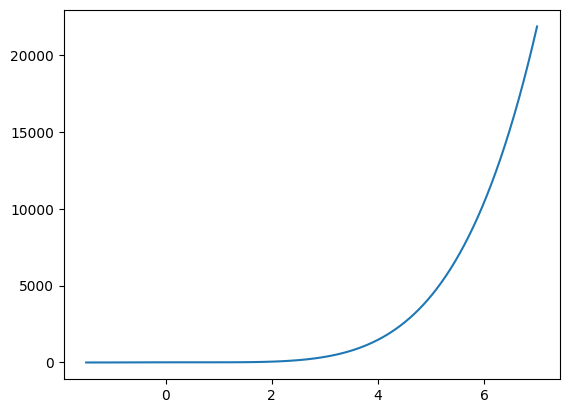

In [ ]:
x_arr=np.linspace(-1.5,7,100)
y_arr=p(x_arr)
plt.plot(x_arr, y_arr)
plt.show

## Question 2 **[3 + 3 marks]**


In Vandermonde matrix, the equation can be written as  $$\mathbf{Xa = y},$$
where in class we constructed, $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & \cdots & x_0^{n-1}  & x_0^n\\
x_1^0 & x_1^1 & \cdots & x_1^{n-1} & x_1^n\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n-1}^0 & x_{n-1}^1 & \cdots & x_{n-1}^{n-1}  & x_{n-1}^n\\
x_n^0 & x_{n}^1 & \cdots & x_n^{n-1} & x_n^n\\
\end{bmatrix}


**Now you have to implement the following matrix**

$\mathbf{X_{new}} = $
\begin{bmatrix}
x_n^n & x_{n-1}^{n} & \cdots & x_1^{n} & x_0^n\\
x_{n}^{n-1} & x_{n-1}^{n-1} & \cdots & x_{1}^{n-1} & x_{0}^{n-1}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n}^{1} & x_{n-1}^{1} & \cdots & x_1^{1} & x_0^{1}\\
x_{n}^{0} & x_{n-1}^{0} & \cdots & x_1^{0} & x_0^{0}\\
\end{bmatrix}

Write a **function** that takes **data_x** as parameter and populates the **$X_{new}$** matrix. Use **(2,3), (4,5), (3,7), (5,2)** data points. Print the matrix, **$X_{new}$** from the given data.


Next, take the **diagonal** elements of your Vandermonde matrix to be the coefficients of an n-degree Polynomial. Consider element with index [0,0] to be the **last coefficient** and with index [n,n] to be the **first coefficient**. Print the Polynomial.

Hint: Use the Polynomial class of Numpy


In [ ]:
def vandermonde(data_x):
  x=data_x
  n=len(x)
  x_new=np.zeros((n,n))
  print(x_new)
  for i in range(n):
    for j in range(n):
      x_new[i,j]=x[(n-1)-i]**((n-1)-j)

  return x_new

data_x = np.array([2,4,3,5])
data_y=np.array([3,5,7,2])
x_new = vandermonde(data_x)
print(x_new)





n=len(data_x)
coeff=[]
for i in range(n):
  for j in range(n):
    if i==j:
      coeff.append(x_new[((n-1)-i),((n-1)-j)])
coeff=np.array(coeff)
print("coefficients--",coeff)
p=Polynomial(coeff)
print(p)
#TO_DO
#print the polynomial

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[125.  25.   5.   1.]
 [ 27.   9.   3.   1.]
 [ 64.  16.   4.   1.]
 [  8.   4.   2.   1.]]
coefficients-- [  1.   4.   9. 125.]
1.0 + 4.0·x + 9.0·x² + 125.0·x³


## Question 03 [8 Marks]


Suppose there is a function, $$ f(x) = 2x^4 + 8x^2 - 7x + 3$$

To analyze the behavior of the Absolute Error when approximating the derivative of the function at **$ x = 5 $** using **Forward Difference**, you have to **determine the minimum value of h** that ensures the absolute error stays below a given **tolerance threshold of 0.002463**. Additionally, **calculate how many reductions of $ℎ$** are required to meet this condition.

As you already know,
1. Forward Difference, $f^\prime(x) = \frac{f(x+h)-f(x)}{h}$
2. Absolute error = |Actual derivative - Approximate derivative|

You should start with an **initial step size of $ℎ = 1.75$** and iteratively **reduce $ℎ$ by one-fourth**, if necessary, until the error condition is satisfied.

**Hint:** You have to use **Polynomial class** from the **numpy** library to define the function, $f(x)$ and Your output should clearly state the **minimum $ℎ$** and the **total number of reductions** required to achieve the desired accuracy.


In [ ]:
coef=np.array([3,-7,8,2])
h=1.75
pf=Polynomial(coef)

def fd(f,x,h):

  fp=((f(x+h)-f(x))/(h))
  return fp


act=pf.deriv(1)(5)
i=0
error=abs(act-fd(pf,5,h))
while error>0.002463:
 i+=1
 h=h*0.25
 error=abs(act-fd(pf,5,h))
 print(error)


print(i,h)



17.0078125
4.18017578125
1.040557861328125
0.2598590850830078
0.06494724750518799
0.01623571664094925
0.0040588607745633
0.001014711601385443
8 2.6702880859375e-05
